<a href="https://colab.research.google.com/github/rezkydp/Percobaan-Ke-2/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Machine learning digunakan untuk menyelesaikan permasalahan apa


untuk menyelesaikan permasalahan klasifikasi diagnosis tumor menjadi dua kelas:

Malignant (1/ganas)

Benign (0/jinak)

Tujuannya adalah untuk membantu proses diagnosis dini kanker dengan menggunakan data hasil biopsi, sehingga pasien dapat segera mendapat penanganan yang tepat. Dengan model klasifikasi seperti K-NN, sistem dapat memprediksi apakah sebuah sampel tumor bersifat jinak atau ganas berdasarkan data fitur numerik.

#2 Dataset : Brain_Tumor_Dataset

#3. EDA

###deskripsi dataset

Tumor Dataset adalah data medis yang digunakan untuk mengklasifikasikan tumor menjadi jinak (0) atau ganas (1). Dataset ini terdiri dari 569 data pasien dengan 30 fitur numerik yang berasal dari hasil analisis gambar sel menggunakan teknik Fine Needle Aspiration (FNA). Fitur-fitur tersebut mencerminkan karakteristik sel seperti ukuran, bentuk, dan tekstur, dan dikelompokkan ke dalam nilai rata-rata, standar error, dan nilai maksimum. Kolom diagnosis digunakan sebagai label target, sementara kolom ID dan satu kolom kosong diabaikan. Dataset ini umum digunakan dalam machine learning untuk membangun model klasifikasi seperti K-NN dalam mendeteksi kanker secara dini.

1 Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2 Load Dataset

Membaca file CSV yang berisi dataset tumor ke dalam bentuk DataFrame.

In [2]:
df = pd.read_csv('Tumor_dataset.csv')

## Data Understanding

Eksplorasi Data

Melihat jumlah baris dan kolom, tipe data, dan contoh isi dari dataset.

In [3]:
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


df.head() mengembalikan 5 baris pertama

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

Metode df.info() mengembalikan informasi tentang DataFrame termasuk tipe data indeks dan kolom, nilai bukan nol, dan penggunaan memori.

In [5]:
df.shape

(20000, 19)

Jumlah baris dan Kolom

In [6]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Location',
       'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
       'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result',
       'Follow_Up_Required'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,20000.0,10000.500000,5773.647028,1.000000,5000.750000,10000.500000,15000.250000,20000.000000
Age,20000.0,49.433700,17.389296,20.000000,34.000000,49.000000,65.000000,79.000000
Tumor_Size,20000.0,5.236552,2.754359,0.500410,2.836686,5.200675,7.624299,9.999420
Survival_Rate,20000.0,70.131699,17.270834,40.002386,55.224439,70.305066,85.043395,99.998125
Tumor_Growth_Rate,20000.0,1.547701,0.835995,0.100017,0.830433,1.541821,2.262484,2.999835


df.describe().Tmenyediakan tabel transposisi yang merangkum ukuran statistik utama untuk setiap fitur numerik dalam dfDataFrame Anda, memberi Anda gambaran umum cepat tentang kecenderungan sentral, penyebaran, dan bentuk distribusi untuk kolom-kolom ini.

In [8]:
df.describe(include='O')

,Gender,Tumor_Type,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Family_History,MRI_Result,Follow_Up_Required
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,2,2,4,4,4,4,4,4,2,2,2,2,2,2
top,Female,Malignant,Temporal,Glioblastoma,II,Headache,Seizures,Seizures,Yes,Yes,Yes,No,Positive,Yes
freq,10016,10030,5118,5068,5093,5045,5054,5027,10021,10060,10097,10002,10029,10101


Kode ini menghitung statistik deskriptif untuk kolom non-numerik (objek) dalam dfDataFrame.

In [9]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Tumor_Type,0
Tumor_Size,0
Location,0
Histology,0
Stage,0
Symptom_1,0
Symptom_2,0


nama kolom DataFrame Anda df, dan nilainya adalah jumlah total nilai yang hilang yang ditemukan di setiap kolom.

## Data Characteristic

 Analisis Univariat

Analisis Univariat untuk Fitur Numerik

<ipython-input-10-2543622094>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Tumor_Growth_Rate,color='r')


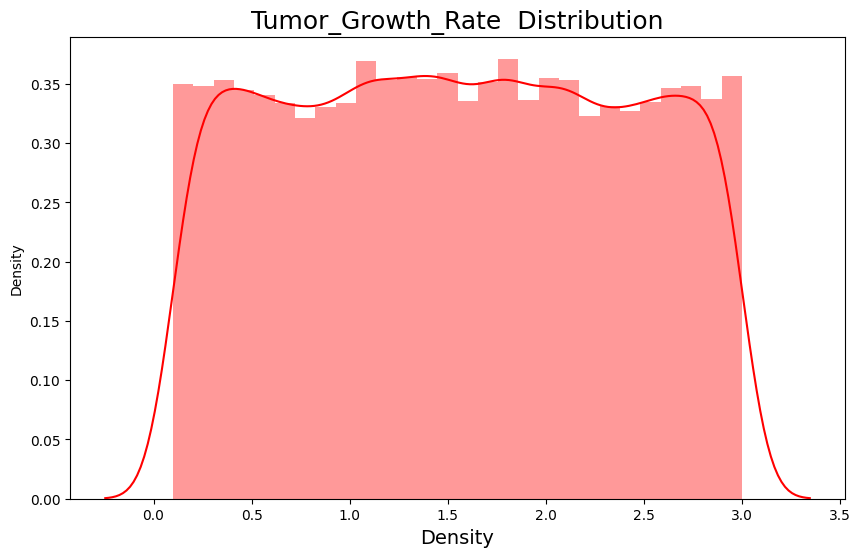

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df.Tumor_Growth_Rate,color='r')
plt.title('Tumor_Growth_Rate  Distribution',size=18)
plt.xlabel('Tumor_Growth_Rate',size=14)
plt.xlabel('Density',size=14)
plt.show()

Distribusi data Tumor_Growth_Rate menunjukkan penyebaran yang hampir seragam (uniform). Tidak ada satu rentang nilai yang mendominasi, artinya pasien dalam dataset memiliki laju pertumbuhan tumor yang sangat bervariasi.

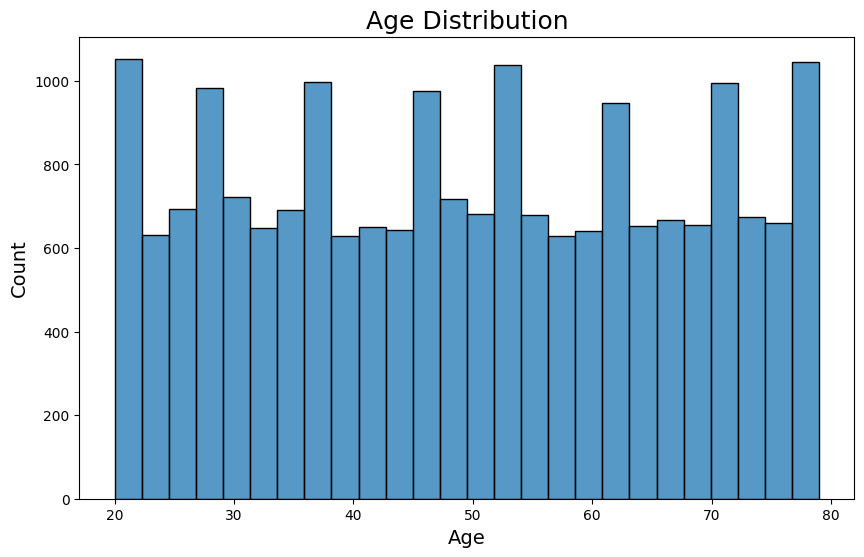

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df.Age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

Grafik ini menunjukkan jumlah pasien berdasarkan usia. Dari histogram ini, kita bisa mengetahui rentang usia terbanyak yang mengalami tumor otak. Jika bentuknya condong ke kanan atau kiri, bisa dianalisis kecenderungan usia pasien.

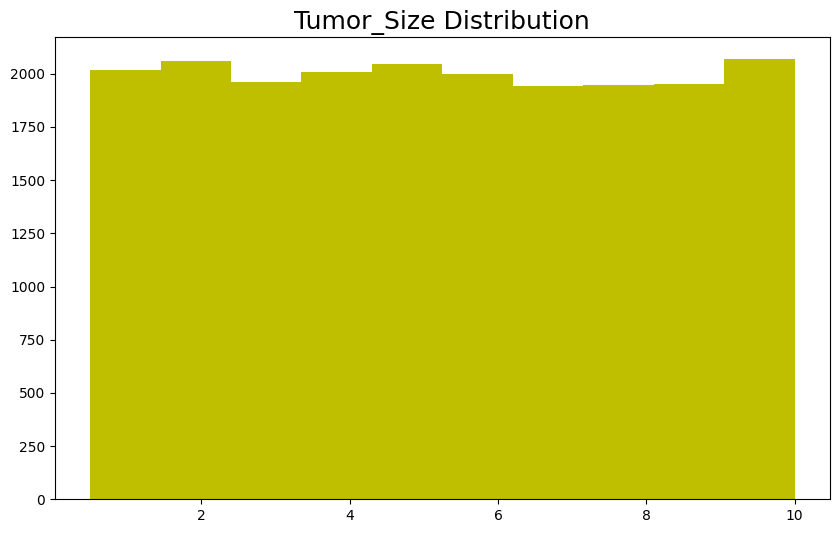

In [12]:
plt.figure(figsize=(10,6))
plt.hist(df.Tumor_Size,color='y')
plt.title('Tumor_Size Distribution',size=18)
plt.show()

Histogram menunjukkan penyebaran ukuran tumor pasien. Dapat dilihat apakah mayoritas tumor berukuran kecil, sedang, atau besar. Pola distribusinya bisa digunakan untuk segmentasi risiko.



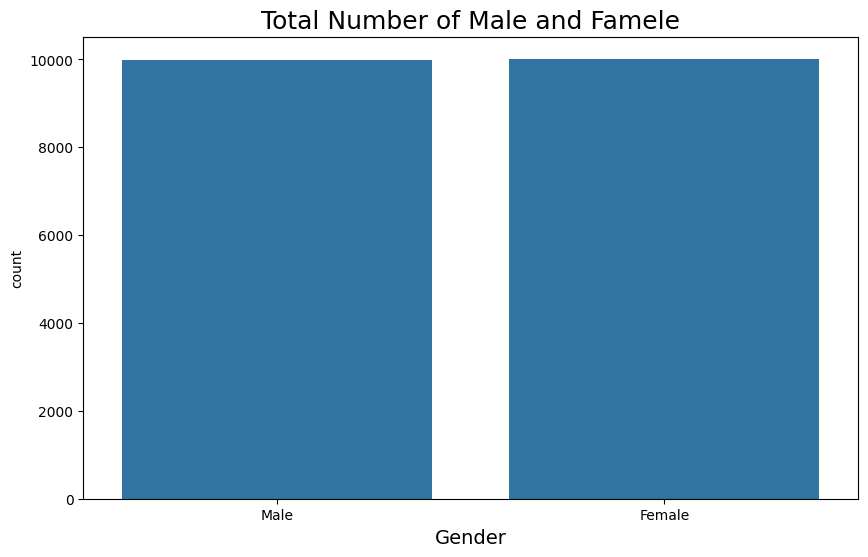

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Gender', data = df)
plt.title('Total Number of Male and Famele',size=18)
plt.xlabel('Gender',size=14)
plt.show()

Grafik ini menunjukkan jumlah pasien laki-laki vs perempuan. Dapat terlihat apakah ada ketimpangan distribusi gender dalam dataset. Penting untuk melihat apakah gender berpengaruh terhadap pertumbuhan atau survival tumor.

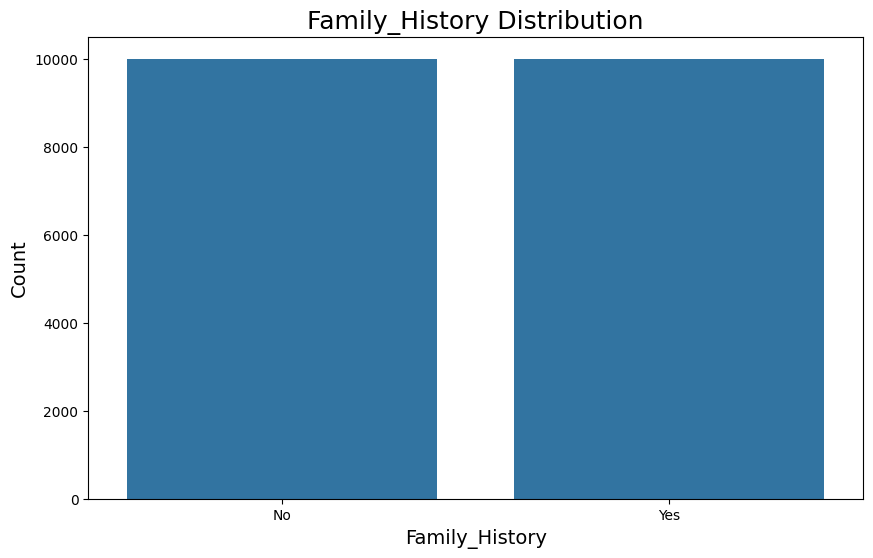

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Family_History', data = df)
plt.title('Family_History Distribution',size=18)
plt.xlabel('Family_History',size=14)
plt.ylabel('Count',size=14)
plt.show()


Menunjukkan perbandingan jumlah pasien yang memiliki riwayat tumor dalam keluarga versus yang tidak. Dari data terlihat hampir seimbang antara “Yes” dan “No”, artinya variabel ini cukup merata dalam dataset dan bisa digunakan untuk prediksi.

In [15]:
df.Family_History.value_counts()

,count
Family_History,
No,10002
Yes,9998


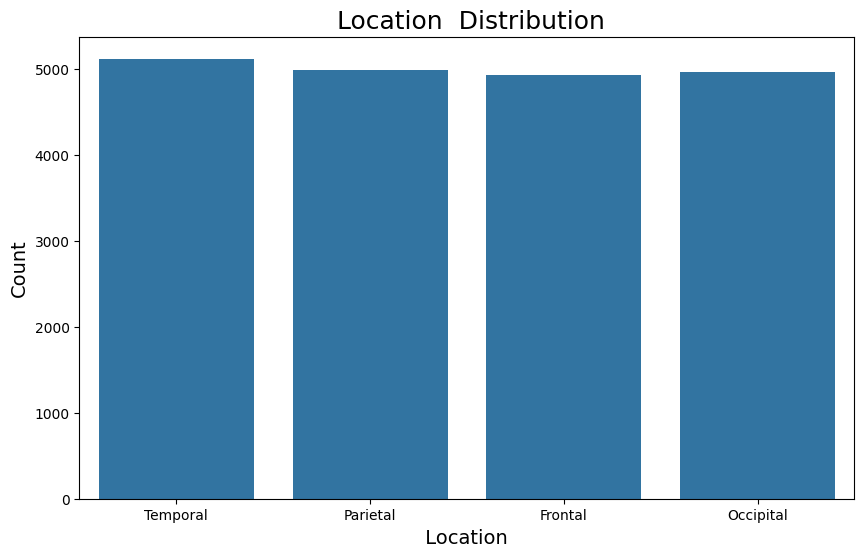

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Location', data = df)
plt.title(' Location  Distribution',size=18)
plt.xlabel(' Location ',size=14)
plt.ylabel('Count',size=14)
plt.show()

Menunjukkan lokasi tumor terbanyak pada pasien (misalnya: frontal, temporal, parietal, dll). Bisa digunakan untuk melihat pola umum lokasi tumor otak yang paling sering terjadi.

Text(0.5, 1.0, 'Stage  vs Survival_Rate')

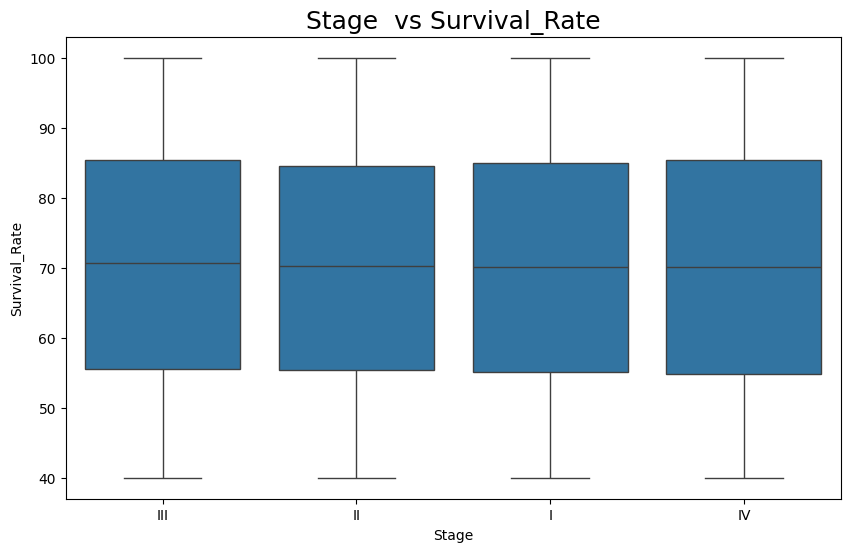

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Stage',y='Survival_Rate',data=df)
plt.title('Stage  vs Survival_Rate',size=18)

Menunjukkan perbandingan tingkat kelangsungan hidup (survival rate) berdasarkan tahap tumor (stage). Umumnya, semakin tinggi tahapannya, survival rate semakin rendah. Boxplot juga menunjukkan median, kuartil, dan outlier.

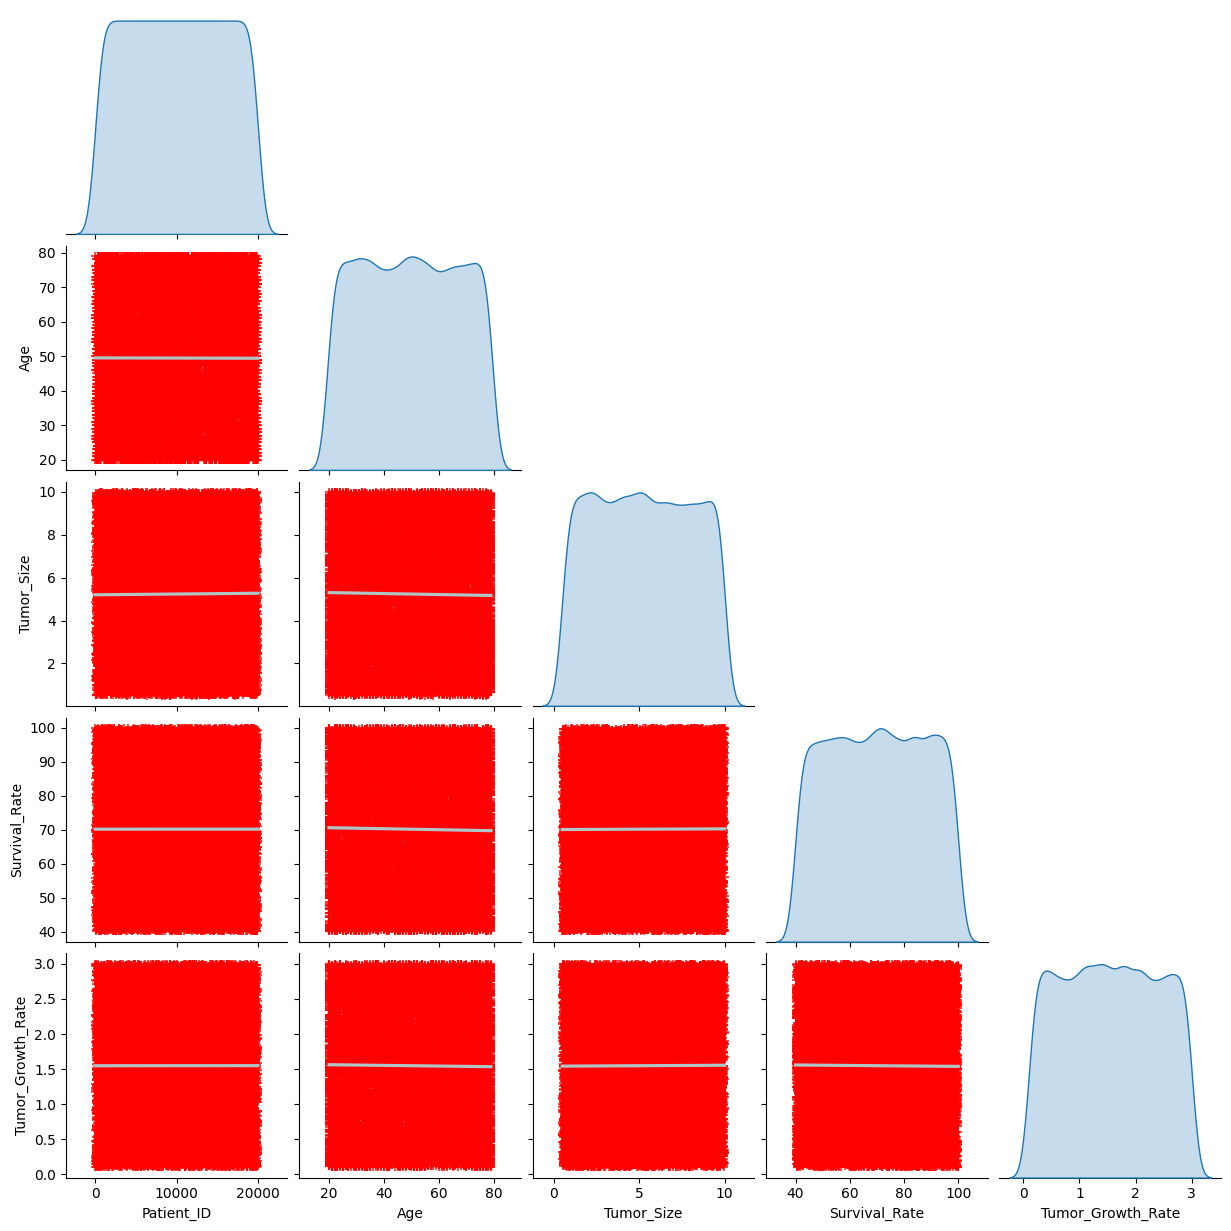

In [18]:
sns.pairplot(df,
                  markers="+", # Changed 'markes' to 'markers'
                  diag_kind="kde",
                  kind='reg',
                  plot_kws={'line_kws':{'color':'#aec6c7'},
                            'scatter_kws': {'alpha':0.7,
                                            'color':'red'}},
                  corner=True);

Grafik ini memberikan hubungan antar semua variabel numerik, termasuk korelasi dan distribusi. Cocok untuk melihat apakah ada hubungan linier antar fitur (misalnya Age vs Tumor_Size, Tumor_Size vs Survival_Rate, dll).

Multivariate Analysis Correlation

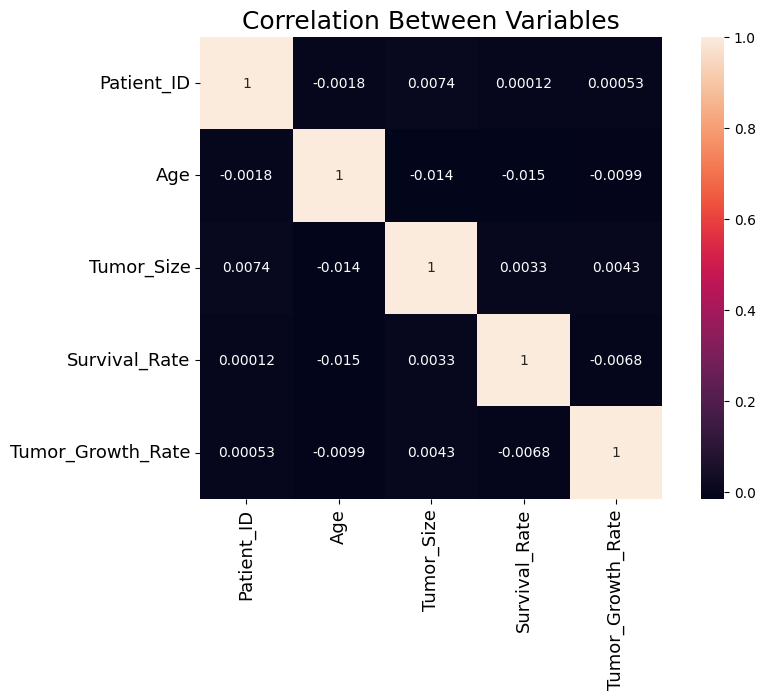

In [19]:
plt.figure(figsize=(10,6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, square=True)
plt.title('Correlation Between Variables', size=18)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

Grafik menunjukkan bahwa tidak ada hubungan linear signifikan antara variabel numerik dalam dataset. Semua nilai korelasi sangat mendekati nol, menandakan bahwa fitur-fitur ini saling bebas secara linier, atau memiliki hubungan yang bersifat non-linear dan perlu pendekatan analisis yang lebih kompleks.

#4 Feature engineering

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

LabelEncodermenetapkan bilangan bulat unik untuk setiap kategori unik dalam kolom. Misalnya, jika kolom berisi 'Yes' dan 'No' LabelEncoderdapat mengubahnya menjadi 0 dan 1.

In [21]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,1,1,5.375612,3,0,2,3,2,2,0,0,0,51.312579,0.111876,0,1,1
1,2,26,1,0,4.847098,2,1,1,0,0,1,1,1,1,46.373273,2.165736,1,1,1
2,3,31,1,0,5.588391,2,3,0,3,0,2,0,0,0,47.072221,1.884228,0,0,0
3,4,29,1,1,1.436600,3,2,3,3,2,0,1,0,1,51.853634,1.283342,1,0,0
4,5,54,0,0,2.417506,2,1,0,0,0,2,0,0,1,54.708987,2.069477,0,1,1


Dalam sesi feature engineering ini, kode mengkonversi data kategorikal menjadi numerik menggunakan LabelEncoder dari scikit-learn, dengan mengulangi setiap kolom DataFrame dan menerapkan encoder jika tipe datanya adalah 'object'.

In [22]:
X=df.drop(columns=[],axis=1)
y=df["Tumor_Type"]

Kode ini memisahkan data menjadi fitur (X, semua kolom DataFrame) dan target (y, kolom Tumor_Type) untuk persiapan model machine learning.

In [23]:
X.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,1,1,5.375612,3,0,2,3,2,2,0,0,0,51.312579,0.111876,0,1,1
1,2,26,1,0,4.847098,2,1,1,0,0,1,1,1,1,46.373273,2.165736,1,1,1
2,3,31,1,0,5.588391,2,3,0,3,0,2,0,0,0,47.072221,1.884228,0,0,0
3,4,29,1,1,1.436600,3,2,3,3,2,0,1,0,1,51.853634,1.283342,1,0,0
4,5,54,0,0,2.417506,2,1,0,0,0,2,0,0,1,54.708987,2.069477,0,1,1


Kode ini menggunakan .head() pada X, yang merupakan DataFrame yang berisi fitur data Anda. .head() adalah fungsi pandas yang menampilkan 5 baris pertama DataFrame secara default.

In [24]:
sc=StandardScaler()

In [25]:
X=sc.fit_transform(X)

In [26]:
y.value_counts()

,count
Tumor_Type,
1,10030
0,9970


y adalah Seri pandas yang menampung variabel target dari kumpulan data Anda. perintah ini akan menunjukkan distribusi variabel target. Anda akan melihat daftar nilai unik (0 dan 1) dan jumlah kemunculan untuk masing-masing.

In [27]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

 teknik oversampling yang menghasilkan sampel sintetis baru untuk kelas minoritas berdasarkan sampel yang ada, bertujuan untuk menyamakan jumlah sampel antar kelas dan menghasilkan model klasifikasi yang lebih seimbang dan akurat.

In [28]:
X,y=sm.fit_resample(X,y)

In [29]:
y.value_counts()

,count
Tumor_Type,
1,10030
0,10030


eksekusi y.value_counts()akan menunjukkan kepada Anda berapa kali setiap jenis tumor unik (ganas dan jinak) muncul dalam kumpulan data Anda.

#5 Modelling : setiap individu menggunakan metode algoritma ML yang beda Dijelaskan mengenai modelnya


In [30]:
# 1. Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data dibagi menjadi 80% data latih dan 20% data uji agar model bisa dilatih dan diuji secara adil. random_state=42 digunakan agar hasil konsisten.

In [31]:
# 2. Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Buat dan latih model K-NN
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

Fitur dinormalisasi menggunakan StandardScaler agar semua nilai berada pada skala yang sama. artinya prediksi berdasarkan 8 tetangga terdekat. K-NN bekerja berdasarkan kemiripan jarak antar data.

In [32]:
# 4. Prediksi dan evaluasi
y_pred = knn.predict(X_test_scaled)

Model digunakan untuk memprediksi data uji. Hasil prediksi nanti bisa dibandingkan dengan label asli untuk mengukur akurasi model.

Model K-Nearest Neighbors (K-NN) dengan nilai k = 11 telah diterapkan pada dataset brain tumor. Data telah dibagi dan dinormalisasi agar model dapat bekerja optimal. Dengan mempertimbangkan 11 tetangga terdekat, model ini memprediksi jenis tumor berdasarkan kemiripan fitur antar data. Pendekatan ini sederhana namun efektif untuk klasifikasi berbasis jarak, terutama setelah normalisasi data. Hasil prediksi kemudian bisa dievaluasi untuk mengetahui kinerjanya terhadap data uji.

#6 Evaluasi performance : matriks yang digunakan sesuai dengan taks ML

In [33]:
#Evaluasi performa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1979    1]
 [   0 2032]]


Model berhasil mengklasifikasikan hampir semua data dengan benar. Hanya terdapat 1 kesalahan dari 4.012 data uji (1980 + 2032), menunjukkan model sangat akurat.

In [34]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1980
           1       1.00      1.00      1.00      2032

    accuracy                           1.00      4012
   macro avg       1.00      1.00      1.00      4012
weighted avg       1.00      1.00      1.00      4012



Semua metrik evaluasi (precision, recall, f1-score) mendapatkan nilai 1.00 untuk kedua kelas (0 dan 1), mencerminkan performansi sempurna. Ini artinya model sangat seimbang dan tidak bias terhadap salah satu kelas.

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9997507477567298


Akurasi model mencapai 99.975%, menandakan bahwa model sangat baik dalam mengenali pola pada data tumor otak yang digunakan.

#7 Inference model dengan data baru

note dari 19 nilai fitur yang digunakan pasien seperti ID, usia, jenis kelamin, ukuran dan lokasi tumor, jenis histologi, stadium kanker, gejala, serta hasil pengobatan dan pemeriksaan (radiasi, operasi, kemoterapi, MRI). Semua data telah dikonversi ke bentuk numerik agar bisa diproses.

In [38]:
import numpy as np

# Data pasien baru (jumlah = 19 nilai)
# 'Patient_ID', 'Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Location','Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3','Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy','Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result','Follow_Up_Required.
data_baru = np.array([[101, 65, 1, 4.2, 3, 1, 2, 1, 1, 0.78, 2.1, 2, 0, 1, 1, 0, 1, 1, 0]])

# Transformasi data baru menggunakan scaler yang sudah dilatih
data_baru_scaled = scaler.transform(data_baru)

# Prediksi
hasil_prediksi = knn.predict(data_baru_scaled)

# Tampilkan hasil
print("Prediksi Tumor_Type:", hasil_prediksi[0])

Prediksi Tumor_Type: 1


Data pasien baru yang terdiri dari 19 fitur dimasukkan ke dalam model, kemudian ditransformasi menggunakan scaler yang sama seperti saat pelatihan untuk menjaga konsistensi skala data. Semua data telah dikonversi ke bentuk numerik agar bisa diproses.

Setelah dilakukan prediksi, model mengeluarkan hasil Prediksi Tumor_Type: 1, yang berarti tumor diklasifikasikan sebagai ganas. Ini menunjukkan bahwa model mampu memproses data baru dan memberikan prediksi yang valid dan sesuai dengan konteks klasifikasi tumor.